<a href="https://colab.research.google.com/github/Psychohistorian11/Fisica_II/blob/master/Clases/PracticaExamen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema

Una cubeta de 2,00 kg que contiene 10,0 kg de agua cuelga de un resorte ideal vertical, cuya constante de fuerza es de 125 N/m, y oscila verticalmente con una amplitud de 3,00 cm . De repente, la cubeta dimana una fuga en la base, goteando agua a una tasa constante de 10,00 g/s. Empleando un método numérico calcule la posición, la velocidad y la aceleración de la cubeta como función del tiempo. Adicionalmente determine computacionalmente la variación del periodo de oscilación como función del tiempo y compare con la predicción analítica


# Analisis

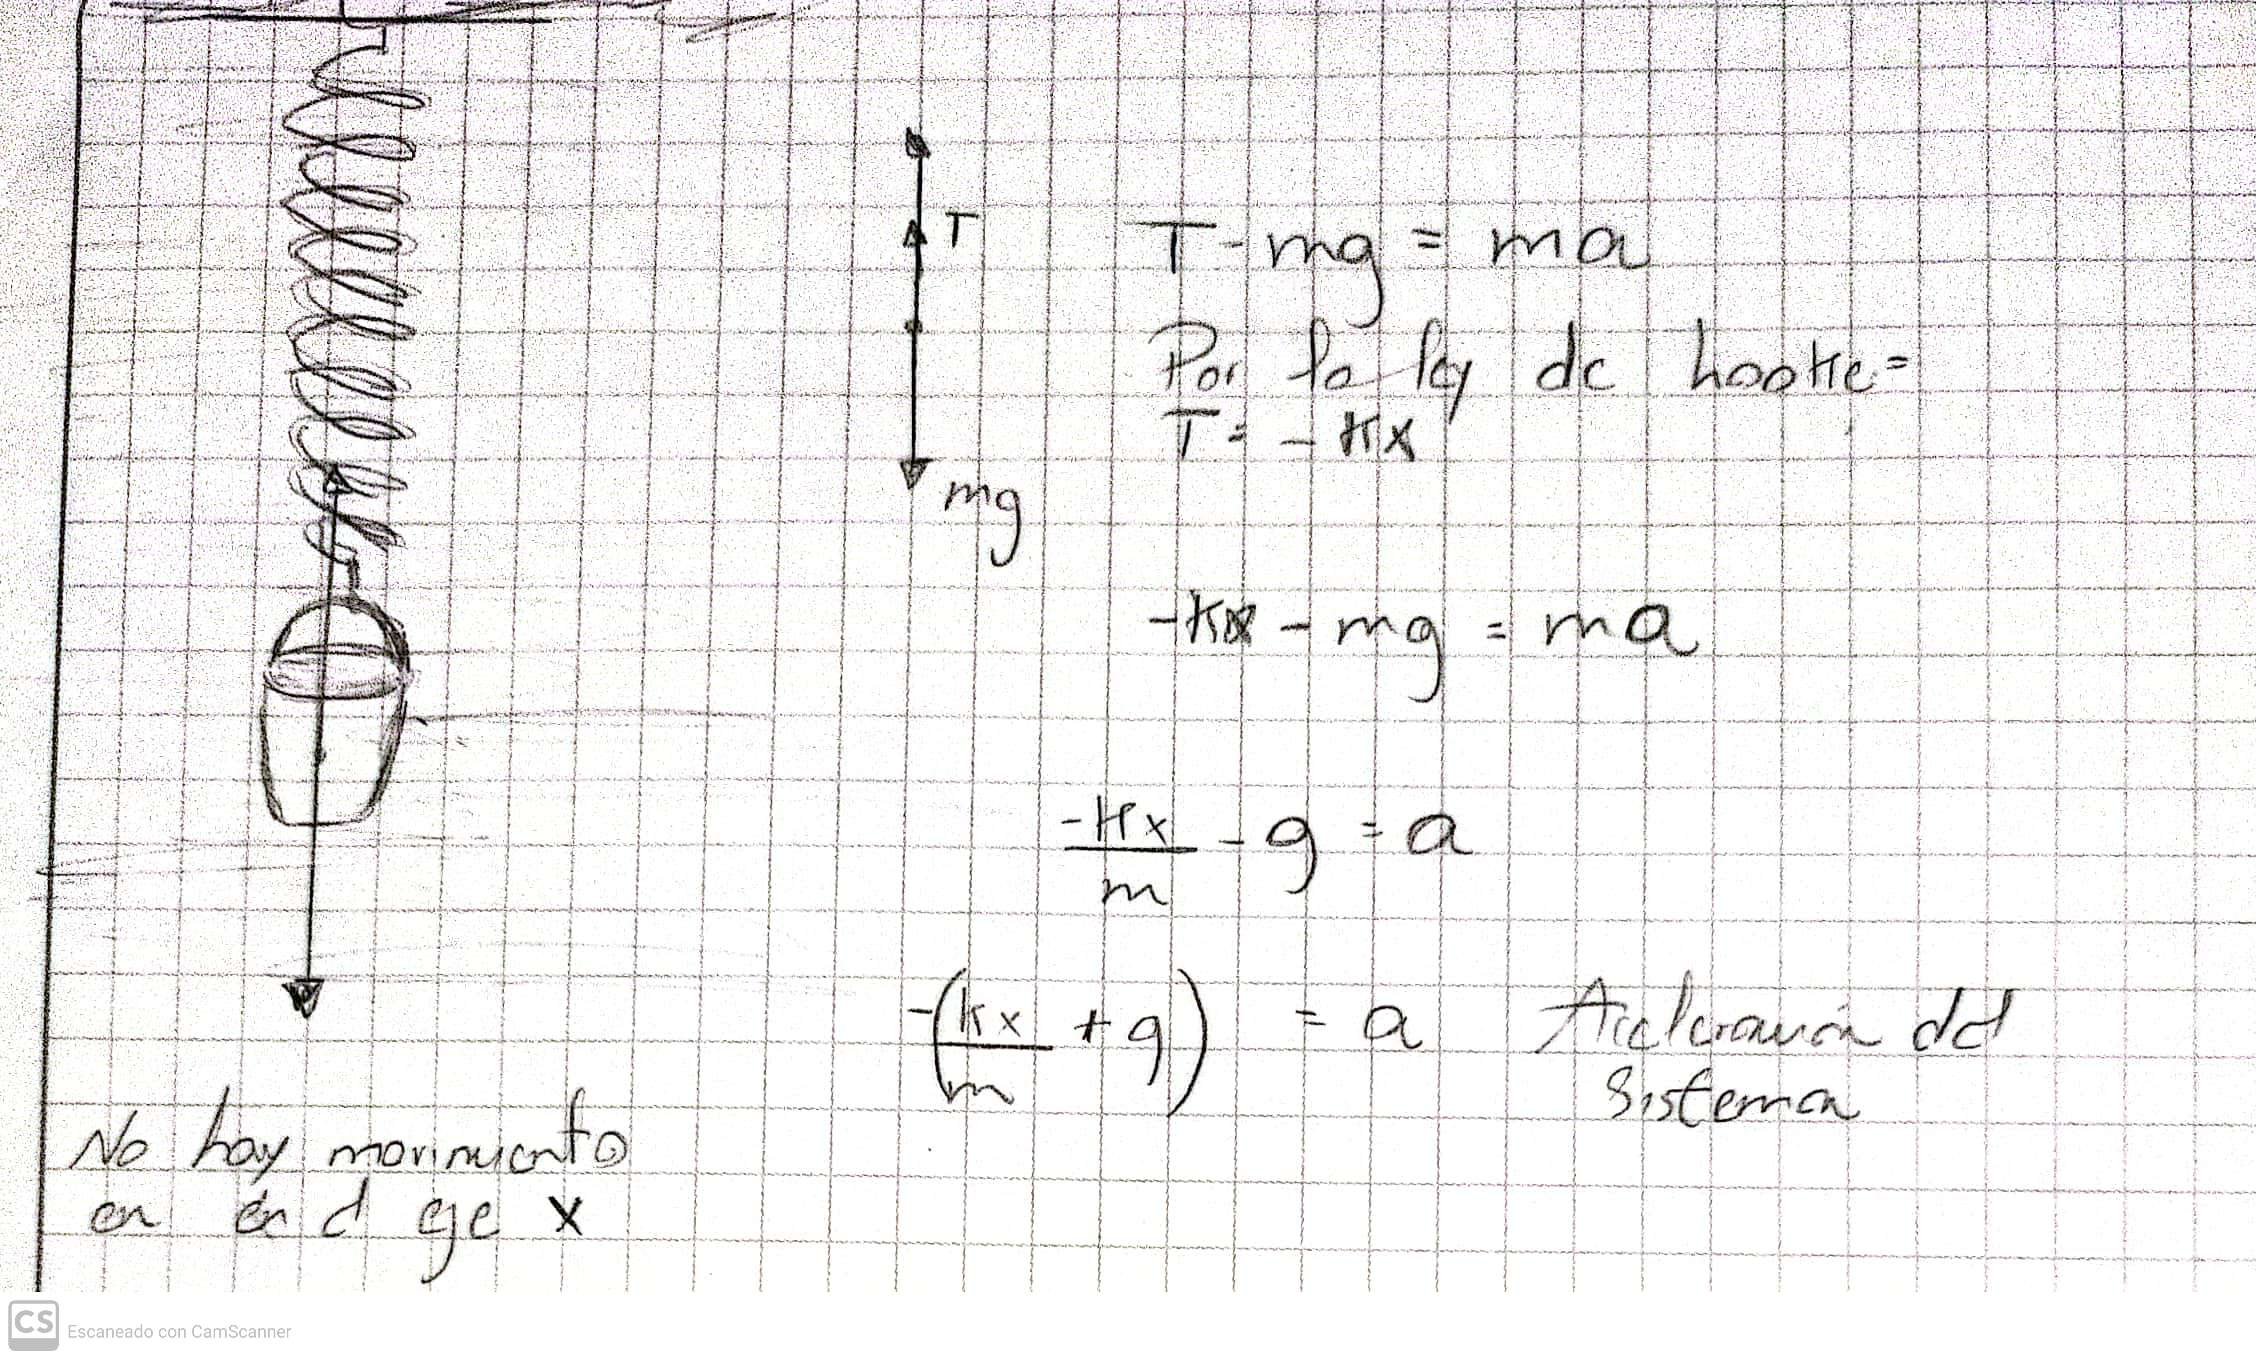

La ecuación de movimiento para, el sistema masa resorte en vertical se puede escribir como:

$$m\frac{d^2\theta(t)}{dt^2}= -kx - mg$$


Computacionalmente el tiempo lo tenemos discretizado entonces podemos reescribir la ecuación anterior en termino de subindices donde cada subindice indica un instante de tiempo

$$x_{new}\approx2x_{i}-x_{i-1}+a_{i}\Delta t ^2. \tag{1} $$  

para el sistema Masa Resorte en Vertical:

$$ma_{i}= -kx - mg$$

$$a_{i} = -\frac{kx}{m}-g$$

$$a_{i} = -(\frac{kx}{m}+g)$$

$$dm = 0.01 kg/s $$


Velocidad de la cubeta(derivada de la posición)

$$v_{new}= \frac{dx_{new}}{dt} = \frac{x_{new}-x_{i}}{dt} \tag{2}$$

# Periodo en función del tiempo

$$ ω = \sqrt\frac{k}{m}$$

$$ 2πf = \sqrt\frac{k}{m}$$

$$ \frac{2π}{T} = \sqrt\frac{k}{m}$$

$$ T = 2π\sqrt\frac{m}{k} \tag{3}$$




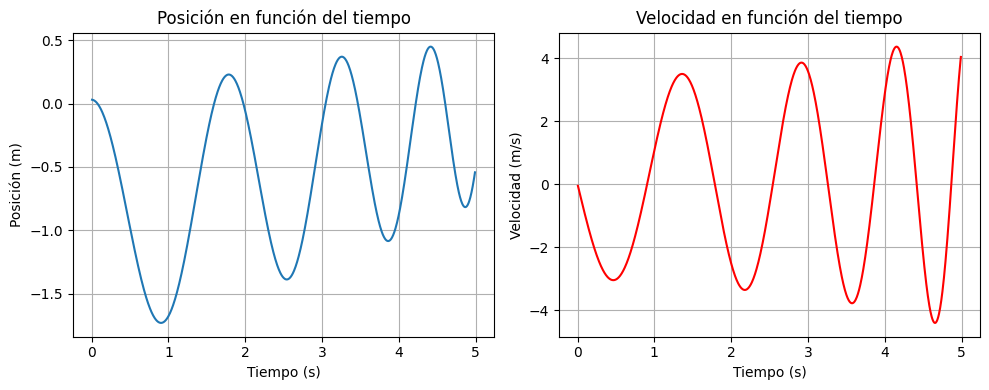

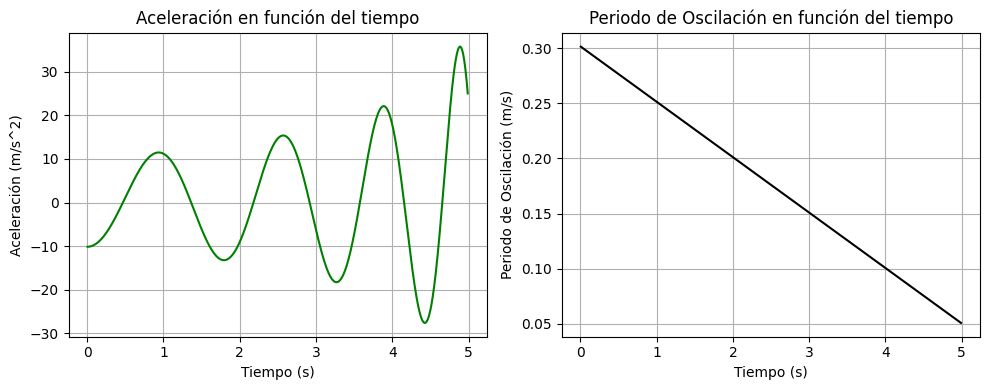

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def verlet1D(x0, v0,m_cubo, m_agua, k, g=9.81, dt=0.005, nts=1000):
    """
    x0: posición inicial
    v0: velocidad inicial
    m_cubo: masa en kilogramos de la cubeta
    m_cubo: masa en kilogramos de el agua
    k: constante del resorte en N/m
    """
    t = []                 # Lista para almacenar el tiempo
    position_list = []     # Lista para almacenar la posición
    velocity_list = []     # Lista para almacenar la velocidad
    acceleration_list = [] # Lista para almacenar la acelaración
    oscillation_period_list = []

    x[0] = x0
    x_i = x0
    m = m_cubo + m_agua #suma total de la cubeta y su contenido


    for i in range(1, nts - 1):
        # Reducción de masa debido a la fuga de agua (10 g/s)
        dm = 0.01  # 10 g = 0.01 kg
        m -= dm    #cambio en la masa
        acceleration = - ((k * x_i / m) + g) #acceleración
        x_new = 2.0 * x_i - x0 + acceleration * dt**2 #posición
        v_new = (x_new - x_i)/dt #velocidad
        period = 2 * np.pi * (m/k)**1/2

        x0 = x_i# a la posición en el pasado le doy la posición actual
        x_i = x_new# a la posición actual le doy la posición en el futuro

        t.append(i * dt)
        position_list.append(x_i)
        velocity_list.append(v_new)
        acceleration_list.append(acceleration)
        oscillation_period_list.append(period)

    return position_list, velocity_list, t,acceleration_list,oscillation_period_list

x, v, t, a, p = verlet1D(0.03, 0.0,2.0, 10.0, 125.0, dt=0.005)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Posición en función del tiempo")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, v, color='red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad en función del tiempo")

plt.tight_layout()
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, a, color="green")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (m/s^2)")
plt.title("Aceleración en función del tiempo")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, p, color='black')
plt.xlabel("Tiempo (s)")
plt.ylabel("Periodo de Oscilación (m/s)")
plt.title("Periodo de Oscilación en función del tiempo")

plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def verlet1D(x0, v0, m, k, g=9.81, dt=0.005, nts=1000):
    """
    x0: posición inicial
    v0: velocidad inicial
    m: masa en kilogramos
    k: constante del resorte en N/m
    """
    x = np.zeros(nts)
    t = np.zeros(nts)
    v = np.zeros(nts)
    x[0] = x0
    v[0] = v0
    t[0] = 0.0
    x[1] = x0 + v0 * dt
    t[1] = dt

    for i in range(1, nts - 1):
        # Reducción de masa debido a la fuga de agua (10 g/s)
        dm = 0.01  # 10 g = 0.01 kg
        m -= dm #cambio en la masa
        acceleration = - ((k * x[i] / m) + g)
        x[i + 1] = 2.0 * x[i] - x[i - 1] + acceleration * dt**2
        t[i + 1] = t[i] + dt
        v[i] = (x[i + 1] - x[i]) / dt

    return x, v, t

x, v, t = verlet1D(0.2, 0.0, 10.0, 125.0, dt=0.005)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Posición en función del tiempo")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, v, color='red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad en función del tiempo")

plt.tight_layout()
plt.grid()
plt.show()